In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [16]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [17]:
X = data[data.columns[:-1]]
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [18]:
Y = data['affair']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [20]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:

def calc(i, X_test, Y_test):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= i:
            predicted = 1
        else:
            predicted = 0
    
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
    
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return tp, fp, fn, tn

def prec_recall(X_test, Y_test):
    precision = []
    recall = []
    for i in np.linspace(0.01,1, 100).tolist():
        tp, fp, fn, tn = calc(i, X_test, Y_test)
        if (tp+fp == 0) | (tp + fn == 0):
            break;
        else:
            precision.append(tp / (tp + fp))
            recall.append(tp / (tp + fn))
    return precision, recall

def roc(X_test, Y_test):
    tpr = []
    fpr = []
    for i in np.linspace(0.01,1, 100).tolist():
        tp, fp, fn, tn = calc(i, X_test, Y_test)
        if (tp+fp == 0) | (tp + fn == 0):
            break;
        else:
            tpr.append(tp / (tp + fn))
            fpr.append(fp / (fp + tn))
    return tpr, fpr

In [63]:
precision_manual, recall_manual = prec_recall(X_test, Y_test)

In [70]:
tpr_manual, fpr_manual = roc(X_test, Y_test)

Text(0, 0.5, 'precision')

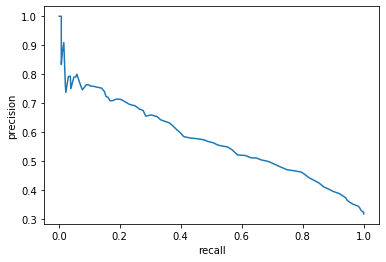

In [64]:
#вручную посчитаные precision и recall
plt.plot(recall_manual, precision_manual)
plt.xlabel("recall")
plt.ylabel("precision")

In [23]:
#используем готовые библиотеки для рассчета precision и recall
precision, recall, thres = precision_recall_curve( Y_test, predictions[:, 1] )

Text(0, 0.5, 'precision')

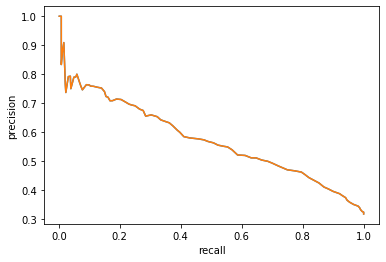

In [68]:
#вводим вручную и автоматически посчитанные графики для precision и recall
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.plot(recall_manual, precision_manual)
plt.xlabel("recall")
plt.ylabel("precision")

In [29]:
#используем готовые библиотеки для рассчета tpr, fpr
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

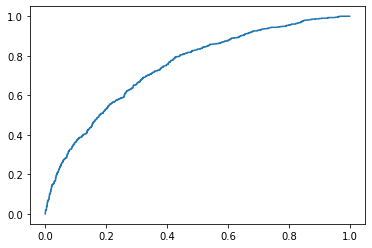

In [30]:
plt.plot( fpr, tpr )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

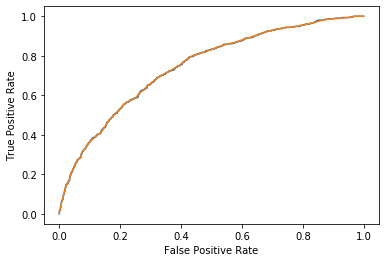

In [72]:
#вводим вручную и автоматически посчитанные графики для tpr, fpr
fig1, ax1 = plt.subplots()
ax1.plot(fpr, tpr )
ax1.plot(fpr_manual, tpr_manual)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
